# Timeseries at extracted grid points and wavelet analysis

* ```Purpose :``` This notebook perform wavelet analysis on sst timeseries previously extracted at various gridpoints. A wavelet spectrum is plotted for each member at each grid point. Then an ensemble mean wavelet spectrum is computed and plotted at each grid point in order to investigate if it is possible to illustrate the inverse cascade (in time).

* ```Author  :``` stephanie.leroux@ocean-next.fr

* ```Date    :``` april 2018

* ```Notes   :```
    - This notebook reads data across many files and i found out that the limit set on my mac was not enoughh (default: 256)so i need to increase the limit to 1024 (as it is on linux) with ```ulimit -n 1024``` in the terminal firtst.
    -  Data for this notebook can be found :

## Load modules

In [2]:
## standart libraries
import os,sys
import numpy as np

from scipy.signal import argrelmax

# xarray
import xarray as xr

# plot
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import Colormap
import matplotlib.dates as mdates

# wavelet (http://pycwt.readthedocs.io/en/latest/)
import pycwt as wavelet
from pycwt.helpers import find

%matplotlib inline 

## Define some functions for plot purposes

In [3]:
def levels(power, dtmin='auto',dtmax='auto'):
    """
    Power levels (colorscale)
    """
    if dtmax=='auto':
        dtmax = power.max()
    if dtmin=='auto':
        dtmin = power.min()
    lev = []
    for i in range(int(np.log2(dtmax / dtmin))):
        dtmin = dtmin * 2
        lev.append(dtmin)
    return lev

def plotWaveSP(power,period,time,patho='./',dpifig=200,label='wavelet plot',dtmin='auto',dtmax='auto',unitperiod='yr',unittime='yr'):
        '''Plot function to plot wavelet spectrum'''
        fig = plt.figure(figsize=(15, 10), dpi=dpifig,facecolor='white')
        ax2 =  plt.gca()  

        #---- Log2 plot of wavelet power
        # colormap
        cmap=plt.cm.viridis 
        # change under_min_val color to white
        Colormap.set_under(cmap,color='w') 
        #color levels (optional set of min max values on colorscale)
        lev = levels(power,dtmin,dtmax)
        # color plot
        pc = plt.contourf(time, np.log2(period),np.log2(power), np.log2(lev),extend='both')
        
        
        #---- Y-Ticks labels in years  (Period)      
        yt = range(int(np.log2(period[0])), int(np.log2(period[-1]) + 1))  # create the vector of periods
        Yticks = [float(np.math.pow(2, p)) for p in yt]  # make 2^periods 
        ax2.set_yticks(yt)
        ax2.set_yticklabels(Yticks)
        ax2.set_ylim(ymin=(np.log2(np.min(period))), ymax=(np.log2(period[-1]/1.8)))
        ax2.set_ylim(ax2.get_ylim()[::-1])
        ax2.set_ylabel('Period ('+unitperiod+')', fontsize=12)
        ax2.get_yaxis().set_tick_params(direction='out', width=1,labelsize=15)  
        ax2.yaxis.label.set_size(15)
        
        #---- X-Ticks *Time)
        ax2.set_xlabel('Time ('+unittime+')', fontsize=12)
        ax2.get_xaxis().set_tick_params(direction='out', width=1,labelsize=15)
        ax2.xaxis.label.set_size(15)
        
        
        #---- Plot horizontal lines for reference periods:
        # Max period / 3. (in yrs)
        ax2.axhline(y=np.log2(period.max()/3.), xmin=0, xmax=1, linewidth=1, color='dimgrey',alpha=0.5)
        # Max period / 2. (in yrs)
        ax2.axhline(y=np.log2(period.max()/2.), xmin=0, xmax=1, linewidth=1, color='dimgrey',alpha=0.5)
        # 1 month
        ax2.axhline(y=np.log2(1./12.), xmin=0, xmax=1, linewidth=1, color='dimgrey',alpha=0.5)
        # 1 YR
        ax2.axhline(y=np.log2(1.), xmin=0, xmax=1, linewidth=1, color='dimgrey',alpha=0.5)
        
        # Plot Cone of influence
        # line
        ax2.plot(time, np.log2(coi), 'dimgrey',alpha=0.3)
        # hatched zone
        ax2.fill_between(time, np.log2(coi), int(np.log2(period[-1]) + 1), color='w', alpha=0.22, hatch='x',edgecolor='w')
        
        #---- Colorbar
        cbar = plt.colorbar(aspect=50)
        cbar.set_label('log2(power)',size=15)
        cbar.ax.tick_params(labelsize=13) 
        
        #---- Plot title
        plt.annotate(label,xy=(1961, np.log2(0.04)), xycoords='data', color='k',size=15)
          
        #plt.show()
        return(fig)
    

##  Specify data to load and some parameters

In [4]:
diri = "/Users/leroux/DATA/OCCIPUT_DATA/Ediags_data/SGR/fromCURIE/GP/"

diro = "/Users/leroux/Desktop/figstmp/"

GPlist=['GPGM','GPGS1','GPGS2','GPGS3','GPSX1','GPSX2','GPSX3','GPSX4','GPSX5']

CONFIGCASE ='ORCA025.L75-OCCITENS'
suffix = '5d_ssha.nc'
varna='ssh'

# Plot output
pltty='.png'
dpifig=200

## Read data

In [5]:
# read and concatenate all files in one array
count=0
for GPNA in GPlist :
    count=count+1
    GPtemp = xr.open_mfdataset(diri+GPNA+'.'+CONFIGCASE+'.???.'+suffix,concat_dim='e')[varna].assign_coords(GPloc=GPNA).expand_dims('GPloc')
    if (count==1):
        GPall =  GPtemp
    else:
        GPall = xr.concat((GPall, GPtemp),dim='GPloc')

GPallch = GPall

## Take intrinsic part of the signal only (remove ensemble mean)

In [6]:
predat = GPallch-GPallch.mean(axis=1) 

## Wavelet analysis

* wavelet computation with package pycwt (doc here http://pycwt.readthedocs.io/en/latest/ )

======== Process GP GPGS1
Process mb #1


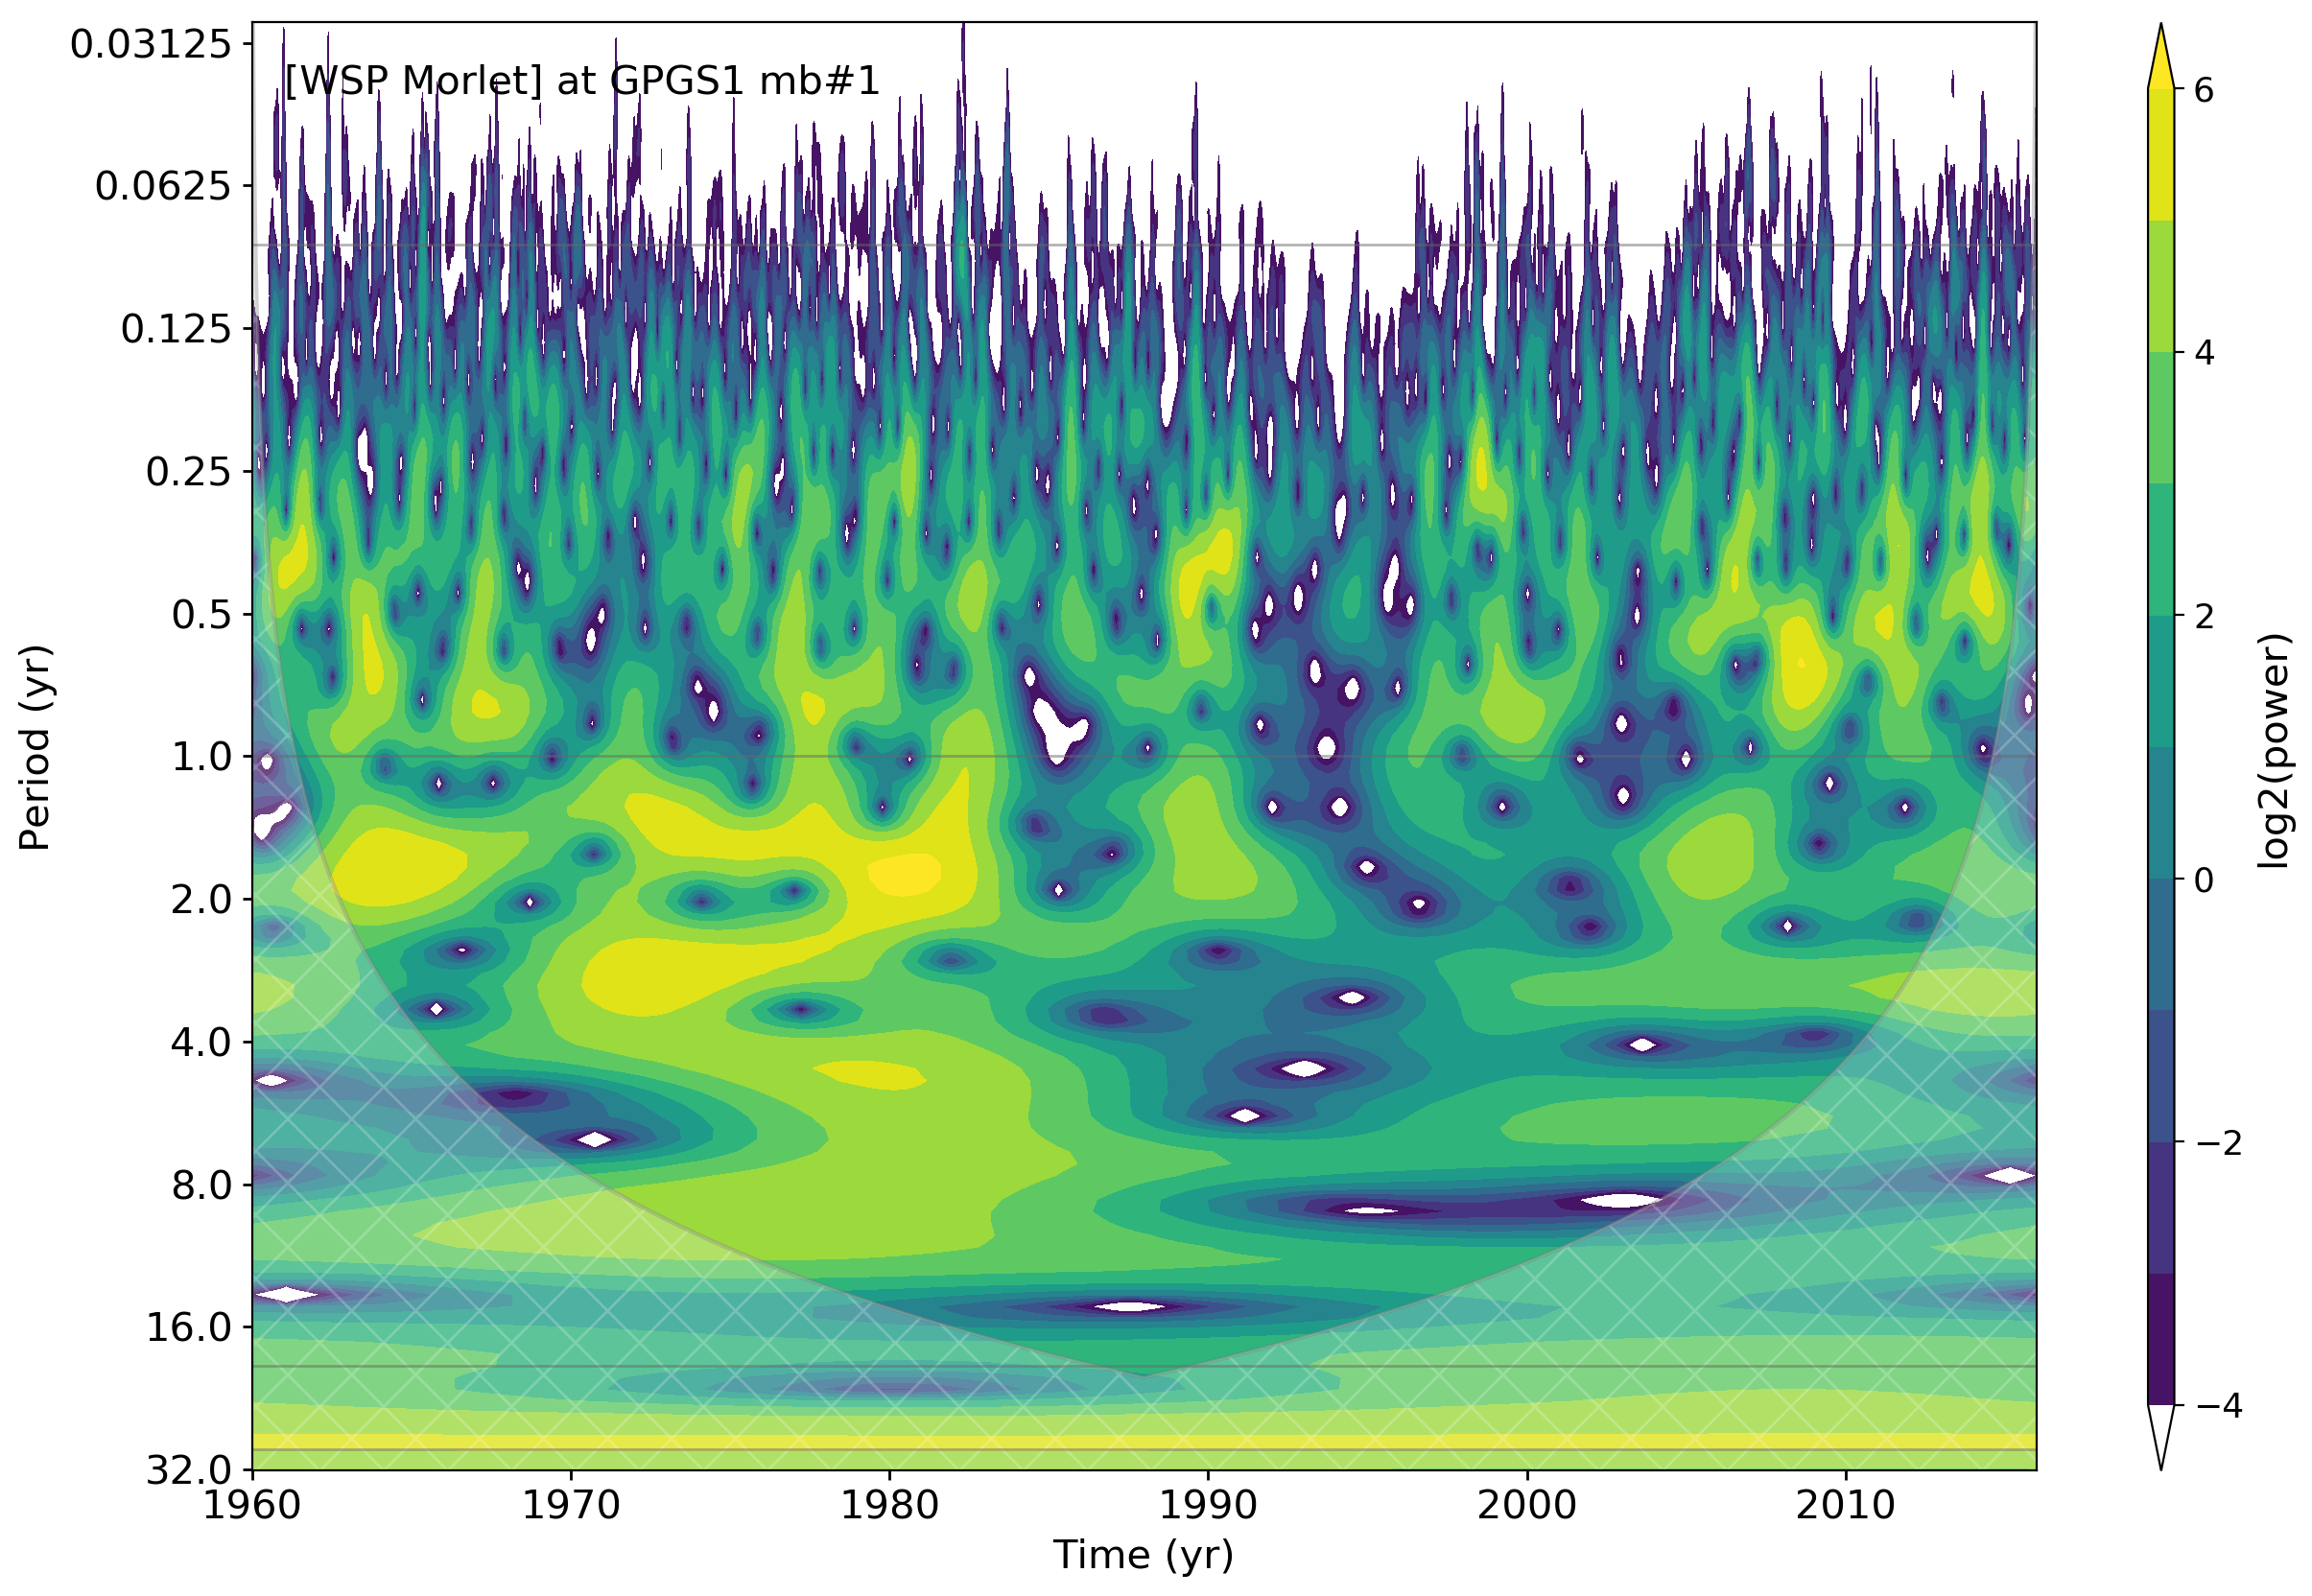

Process mb #2
Process mb #3
Process mb #4
Process mb #5
Process mb #6
Process mb #7
Process mb #8
Process mb #9
Process mb #10
Process mb #11
Process mb #12


KeyboardInterrupt: 

In [7]:
# number of timesteps
N = predat.time_counter.size

# time coordinate in x axis
dt=(1./73.)   # (every-5-day data)
t0=1960
t = np.arange(0, N) * dt + t0

#----- WAVELET PARAMETERS
mother = wavelet.Morlet(6)
s0 = 2. * dt  # Starting scale, in this case 2 * (1/73) years = 10 days
dj = 1. / 12.  # Twelve sub-octaves per octaves
J = (np.log2(N * dt / s0)) / dj # 7. / dj  # Seven powers of two with dj sub-octaves

#----- output directory for figures
patho = "/Users/leroux/Desktop/figstmp/"

#----- LOOP on grid points and members

# loop on the grid points
for GPLOC in GPlist[1:2]:
    print("======== Process GP "+GPLOC)
    ico=0
    plt.close('all')
    ico=0
    # loop omn the members
    for mbe in range(0,50):
        plt.close('all')
        print("Process mb #"+str(mbe+1))
        ico=ico+1
        namefo="WSP_"+mother.name+"_"+GPLOC+"_mb_"+str(mbe+1)
        label="[WSP "+mother.name+"] at "+GPLOC+" mb#"+str(mbe+1)
                
        #----- extract DATA at given gridpoint and for given member
        dat = np.array(predat.sel(GPloc=GPLOC,e=mbe,y=0,x=0))
           
        #----- NORMALIZATION and DETRENDING (LIN)
        # here: fit a one-degree polynomial function and then subtract it from the original data.
        p = np.polyfit(t - t0, dat, 1)
        dat_notrend = dat - np.polyval(p, t - t0)
        std = dat_notrend.std()  # Standard deviation
        var = std ** 2  # Variance
        dat_norm = dat_notrend / std  # Normalized dataset

        #----- WAVELET COMPUTATION
        wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(dat_norm, dt, dj, s0, J,
                                                              mother)
        # Normalized wavelet and Fourier equivalent periods for each wavelet scale
        power = (np.abs(wave)) ** 2
        period = 1. / freqs
  
        #----- PLOT individual wavelet
        fig = plotWaveSP(power,period,t,patho=patho,label=label,dtmin=0.03125,unitperiod='yr',unittime='yr')
        # Save fig in png, resolution dpi
        fig.savefig(patho+'%s.png' % namefo, facecolor=fig.get_facecolor(), edgecolor='none',dpi=dpifig,bbox_inches='tight', pad_inches=0)#
  
        # Sum over members
        if (ico==1):        
            powermean = power
            plt.show()
        else:
            powermean = power+powermean
    
    # Compute average
    powermean = (1./ico)*powermean
    
    # Plot ensemble mean wavelet
    label="[WSP "+mother.name+"] at "+GPLOC+" (emean WSP)"
    namefo="WSP_"+mother.name+"_"+GPLOC+"_emeamWSP"
    plt.close("all")
    fig = plotWaveSP(powermean,period,t,patho=patho,label=label,dtmin=0.03125,unitperiod='yr',unittime='yr')
    plt.show()
    
    # Save fig in png, resolution dpi
    fig.savefig(patho+'WSP.%s.png' % namefo, facecolor=fig.get_facecolor(), edgecolor='none',dpi=dpifig,bbox_inches='tight', pad_inches=0)#


        
      
        
        